<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [2]:
### Type your code here
tr_mcc_codes = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('data/tr_types.csv', sep=';')
transactions = pd.read_csv('data/transactions.csv', nrows=1000000)
gender_train = pd.read_csv('data/gender_train.csv')
gender_train

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1
...,...,...
8395,90417572,0
8396,66837341,0
8397,10758984,1
8398,11376556,0


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [3]:
### Type your code here
# Объединение таблиц tr_mcc_codes и tr_types через inner join
transactions = transactions.merge(tr_mcc_codes, on='mcc_code', how='inner')
transactions = transactions.merge(tr_types, on='tr_type', how='inner')

# Объединение таблиц transactions и gender_train через left join
transactions = transactions.merge(gender_train, on='customer_id', how='left')
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [4]:
negative_transactions = transactions[transactions['amount'] < 0]
negative_transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999562,4181983,336 11:41:14,4900,2320,-3571.01,888918,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,NaN
999563,14892960,61 12:28:52,4900,2320,-718.69,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,NaN
999564,14892960,61 12:30:47,4900,2320,-35575.31,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,NaN
999565,62693770,333 19:26:37,4900,2320,-72385.87,888917,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,0.0


In [5]:
negative_transactions.groupby('gender')['amount'].mean()

gender
0.0   -53376.917122
1.0   -86094.972042
Name: amount, dtype: float64

In [6]:
### Type your code here
# Выделение только отрицательных значений трат

#negative_transactions = transactions[transactions['amount'] < 0]

# Рассчитываем средние траты для женщин и мужчин
average_spending_by_gender = negative_transactions.groupby('gender')['amount'].mean()
# Вычисляем модуль разницы между средними тратами
spending_difference = abs(average_spending_by_gender[1] - average_spending_by_gender[0])

# Округляем результат до двух знаков после запятой
rounded_spending_difference = round(spending_difference, 2)

# Выводим результат
print("{:.2f}".format(rounded_spending_difference))



32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [7]:
### Type your code here
# Создаем новый столбец mcc_code+tr_type
transactions['mcc_code+tr_type'] = transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str)

# Оставляем только отрицательные значения amount
negative_transactions = transactions[transactions['amount'] < 0]

# Группируем по mcc_code+tr_type и подсчитываем количество наблюдений и дисперсию
grouped_variances = negative_transactions.groupby('mcc_code+tr_type')['amount'].agg(['count', 'var'])

# Оставляем только категории с количеством наблюдений >= 10
grouped_variances = grouped_variances[grouped_variances['count'] >= 10]

# Вычисляем отношение максимальной дисперсии к минимальной
max_variance = grouped_variances['var'].max()
min_variance = grouped_variances['var'].min()
variance_ratio = max_variance / min_variance

# Округляем результат до ближайшего целого
rounded_variance_ratio = round(variance_ratio)

# Выводим результат
print(rounded_variance_ratio)

9170599


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
#    - 5) Плата за получение наличных в АТМ. Россия
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [8]:
### Type your code here
# Отбираем только положительные суммы прихода на карту
positive_incomes = transactions[transactions['amount'] > 0]

# Группируем по типу транзакции и полу, и находим максимальную сумму прихода для каждой группы
max_income_by_transaction_gender = positive_incomes.groupby(['tr_description', 'gender'])['amount'].max().reset_index()
# Сортируем значения по максимальной сумме прихода для каждой транзакции и пола
max_income_by_transaction_gender_sorted = max_income_by_transaction_gender.sort_values(by='amount')
max_income_by_transaction_gender_sorted
# Создаем словарь для хранения топ-5 наименьших максимальных сумм прихода для каждого пола
top_5_min_max_income = {
    'M': max_income_by_transaction_gender_sorted[max_income_by_transaction_gender_sorted['gender'] == 0.0].head(5),
    'F': max_income_by_transaction_gender_sorted[max_income_by_transaction_gender_sorted['gender'] == 1.0].head(5)
}
top_5_min_max_income


{'M':                                        tr_description  gender   amount
 51  Плата за перевод на карту (с карты) через АТМ ...     0.0  1122.96
 52        Плата за получение наличных в АТМ. Зарубеж.     0.0  2245.92
 53          Плата за получение наличных в АТМ. Россия     0.0  2245.92
 67  Списание с карты на карту по операции <перевод...     0.0  2335.75
 55                Плата за получение наличных. Россия     0.0  5041.86,
 'F':                                     tr_description  gender    amount
 26             Выдача наличных через POS Сбербанка     1.0   2245.92
 54       Плата за получение наличных в АТМ. Россия     1.0   2245.92
 61                           Покупка. POS ТУ СБ РФ     1.0  28803.87
 66  Списание после проведения претензионной работы     1.0  64682.37
 19                      Возврат  покупки. ТУ СБ РФ     1.0  79280.83}

In [9]:
max_income_by_transaction_gender_sorted


,tr_description,gender,amount
51,Плата за перевод на карту (с карты) через АТМ ...,0.0,1.122960e+03
52,Плата за получение наличных в АТМ. Зарубеж.,0.0,2.245920e+03
26,Выдача наличных через POS Сбербанка,1.0,2.245920e+03
54,Плата за получение наличных в АТМ. Россия,1.0,2.245920e+03
53,Плата за получение наличных в АТМ. Россия,0.0,2.245920e+03
...,...,...,...
41,Перевод на карту (с карты) через Мобильный бан...,0.0,1.122958e+07
1,Взнос наличных через POS,1.0,2.133620e+07
0,Взнос наличных через POS,0.0,2.245916e+07
39,Перевод на карту (с карты) через Мобильный бан...,0.0,6.737747e+07


In [10]:
# Создаем список интересующих нас типов транзакций
desired_transactions = [
    'Покупка. POS ТУ СБ РФ',
    'Списание после проведения претензионной работы',
    'Плата за получение наличных. Россия',
    'Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте',
    'Плата за получение наличных в АТМ. Россия',
    'Наличные. Зарубеж. банк',
    'Возврат покупки. POS ТУ Россия'
]

# Создаем множества из типов транзакций, которые есть у мужчин и у женщин
male_transaction_set = set(top_5_min_max_income['M']['tr_description'])
female_transaction_set = set(top_5_min_max_income['F']['tr_description'])

# Находим пересечение множеств
common_transactions = male_transaction_set.intersection(female_transaction_set)

# Фильтруем топ-5 наименьших максимальных сумм прихода для каждого пола для получения только общих транзакций
common_transactions_df = pd.concat([top_5_min_max_income['M'][top_5_min_max_income['M']['tr_description'].isin(common_transactions)],
                                   top_5_min_max_income['F'][top_5_min_max_income['F']['tr_description'].isin(common_transactions)]])
common_transactions_df

,tr_description,gender,amount
53,Плата за получение наличных в АТМ. Россия,0.0,2245.92
54,Плата за получение наличных в АТМ. Россия,1.0,2245.92


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
#    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
#    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
#    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [11]:
### Type your code here
# Выделение относительного дня tr_day
transactions['tr_day'] = transactions['tr_datetime'].str.split(' ').str[0]

# Фильтрация транзакций с количеством уникальных MCC кодов больше 75 в каждый относительный день
filtered_transactions = transactions.groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)

# Сгруппируем полученный отфильтрованный датафрейм по MCC коду и полу
grouped_transactions = filtered_transactions.groupby(['mcc_code', 'gender'])['amount'].median().reset_index()

# Анализируем результаты
# Для удобства взгляда, можно преобразовать группировку в сводную таблицу, как вариант:
pivot_table = grouped_transactions.pivot_table(index='mcc_code', columns='gender', values='amount', aggfunc='median')
pivot_table

gender,0.0,1.0
mcc_code,,
742,-19651.76,-47770.63
1711,-674897.69,-14912.88
1731,NaN,-55923.30
1799,-45704.39,-11274.50
2741,-20746.42,-17338.47
...,...,...
8999,-2245.92,-8624.32
9222,-11903.35,-11678.76
9311,-10460.80,-11229.58


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
 #   - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [12]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [42]:
# Type your code here
# Выделение относительного дня tr_day
transactions['tr_day'] = transactions['tr_datetime'].str.split(' ').str[0]
filter_values = transactions['amount'] < 0
transactions_negative_amount = transactions[filter_values]
#transactions['amount_n']=transactions[transactions['amount']<0].fillna('amount')
# Разделение расходов на 5 бакетов amount_bucket с помощью pd.qcut
#transactions['amount_bucket'] = pd.qcut(transactions['amount'], 5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])
# Разбиваем отрицательные значения amount на 5 бакетов
# = pd.qcut(transactions[transactions['amount'] < 0]['amount'], q=5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

# Разбиваем отрицательные значения amount на 5 бакетов
bins = pd.qcut(transactions[transactions['amount'] < 0], q=5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

# Обновляем значения amount_bucket в исходном датафрейме
transactions.loc[transactions['amount'] < 0, 'amount_bucket'] = bins[1]

# Обновляем значения amount_bucket в исходном датафрейме
#transactions.loc[transactions['amount'] < 0, 'amount_bucket'] = bins
# Отнесение неотрицательных трат к категории 'Income'
#transactions['amount_bucket'] = transactions['amount_bucket'].cat.add_categories('Income')  #.fillna('Income')

# Выделение часа tr_hour из поля tr_datetime
transactions['tr_hour'] = transactions['tr_datetime'].str.split(' ').str[1].str[:2]

# Построение сводной таблицы с полем gender в качестве значения, tr_hour - индекса и amount_bucket - столбца
pivot_table = transactions.pivot_table(index='tr_hour', columns='amount_bucket', values='gender', aggfunc='mean')
bins
# Отрисовка полученной сводной таблицы
plot_pivot_table(pivot_table)

ValueError: Input array must be 1 dimensional

In [56]:
# Удалим текущие категории "amount_bucket" из датафрейма "transactions"
transactions['amount_bucket'] = transactions['amount_bucket'].astype('category')

# Разбиваем отрицательные значения amount на 5 бакетов
negative_amount_bins = pd.qcut(transactions[transactions['amount'] < 0]['amount'], q=5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])

# Создаем список всех уникальных значений "amount_bucket"
all_categories = transactions['amount_bucket'].cat.categories.tolist()

# Добавляем новые категории к списку
all_categories.extend(['Income'])

# Обновляем категории в поле "amount_bucket" для отрицательных значений
transactions['amount_bucket'] = negative_amount_bins

# Добавляем категорию "Income" к неотрицательным значениям
transactions['amount_bucket'] = transactions['amount_bucket'].cat.add_categories('Income')

# Заполняем пустые значения новой категорией "Income"
transactions['amount_bucket'].fillna('Income', inplace=True)

In [58]:
# Извлекаем час транзакции из поля "tr_datetime"
transactions['tr_hour'] = transactions['tr_datetime'].str.split(' ').str[1].str.split(':').str[0].astype(int)

In [60]:

# Создаем сводную таблицу
pivot_table = pd.pivot_table(transactions, index='tr_hour', columns='amount_bucket', values='gender', aggfunc='mean')

# Показываем средний пол (gender) для каждого часа (tr_hour) и категории (amount_bucket)
print(pivot_table)

amount_bucket  Very High      High    Middle       Low  Very Low    Income
tr_hour                                                                   
0               0.578957  0.581928  0.530195  0.544178  0.517352  0.737148
1               0.583643  0.594737  0.578947  0.539936  0.450237  0.965922
2               0.524804  0.454183  0.489796  0.371014  0.349099  0.965834
3               0.533541  0.390374  0.434000  0.358879  0.284333  0.945011
4               0.505653  0.438721  0.428981  0.450858  0.290030  0.914473
5               0.524298  0.442200  0.459046  0.355699  0.374491  0.880842
6               0.516811  0.459614  0.431373  0.416000  0.366095  0.815352
7               0.518356  0.461418  0.485009  0.433982  0.412609  0.757958
8               0.552372  0.478275  0.472192  0.436529  0.431677  0.725043
9               0.517915  0.484714  0.448969  0.429991  0.406120  0.728651
10              0.533172  0.458109  0.458242  0.436683  0.430791  0.725908
11              0.516565 

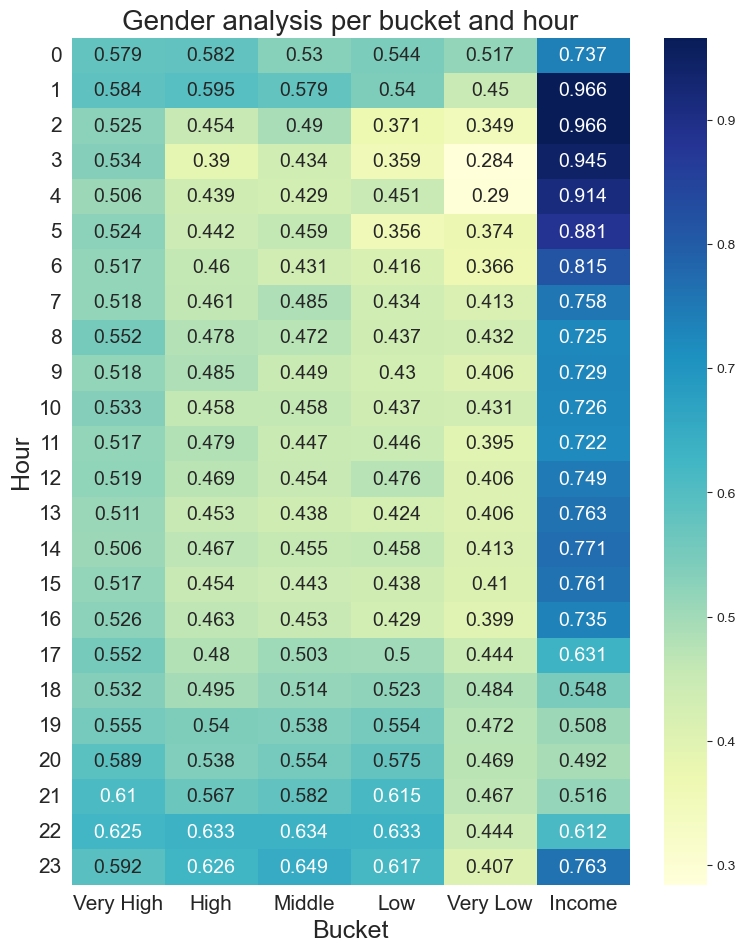

In [61]:
# Отрисовка полученной сводной таблицы
plot_pivot_table(pivot_table)

In [94]:
# 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
question_1 = pivot_table.loc[1:5]['Income'].mean()

# 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
question_2 = pivot_table.loc[:, 'Income'].mean()

# 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
question_3 = np.mean([pivot_table.loc[3]['Very Low'], pivot_table.loc[3]['Low']])

# 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%).
question_4 = pivot_table.loc[:, ['Low', 'Very Low']].mean()

# 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.
question_5 = pivot_table.loc[:, 'Very High'].mean()

# Выводим результаты ответов на вопросы
print("Вопрос 1:", question_1)
print("Вопрос 2:", question_2)
print("Вопрос 3:", question_3)
print("Вопрос 4:", question_4)
print("Вопрос 5:", question_5)

KeyError: 'Income'

In [72]:
pivot_table.loc[1:5]['Income'].mean()

0.9344163129535443

In [88]:
np.mean([pivot_table.loc[3]['Very Low'], pivot_table.loc[3]['Low']])

0.32160559663045246

In [59]:
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day,amount_bucket,tr_hour,amount_n
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,0,Very Low,10,True
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,6,Low,7,True
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,8,Very Low,7,True
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,11,Very Low,8,True
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,11,Very Low,14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,18,Income,23,False
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,206,Income,19,False
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,90,Income,22,False
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,104,Income,23,False


#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

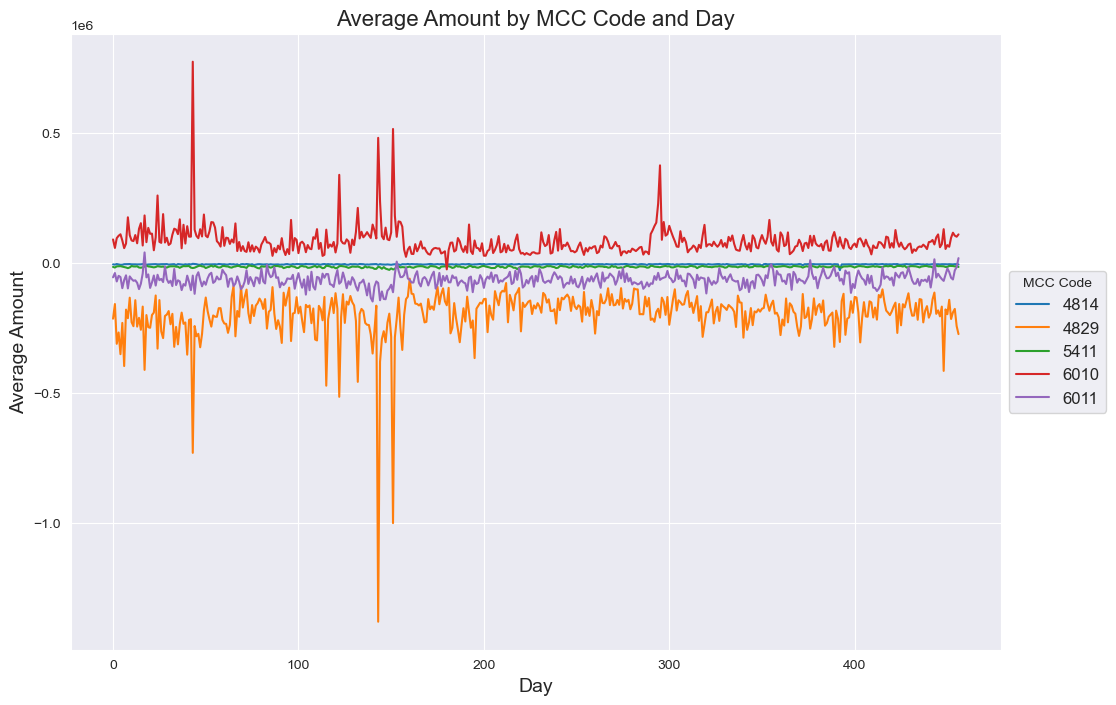

In [15]:
# Type your code here
# Выделение относительного дня tr_day и изменение его типа на int
transactions['tr_day'] = transactions['tr_datetime'].str.split(' ').str[0]
transactions['tr_day'] = transactions['tr_day'].astype(int)

# Выбор MCC кодов, которые встретились более 60000 раз
popular_mcc_codes = transactions['mcc_code'].value_counts()[transactions['mcc_code'].value_counts() > 60000].index

# Фильтрация данных по популярным MCC кодам
filtered_transactions = transactions[transactions['mcc_code'].isin(popular_mcc_codes)]

# Группировка по дню и MCC-коду, получение средних значений суммы amount
grouped_transactions = filtered_transactions.groupby(['tr_day', 'mcc_code'])['amount'].mean().unstack()

# Отрисовка зависимости средних сумм по каждому из MCC-кодов по дням
grouped_transactions.plot(figsize=(12, 8))
plt.xlabel('Day', fontsize=14)
plt.ylabel('Average Amount', fontsize=14)
plt.title('Average Amount by MCC Code and Day', fontsize=16)
plt.legend(title='MCC Code', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()


In [19]:
tr_mcc_codes

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело
...,...,...
179,9211,"Судовые выплаты, включая алименты и детскую по..."
180,9222,Штрафы
181,9311,Налоговые платежи
182,9399,"Правительственные услуги, нигде ранее не класс..."


In [91]:
# Изменение типа поля "tr_day" на int
transactions['tr_day'] = transactions['tr_day'].astype(int)

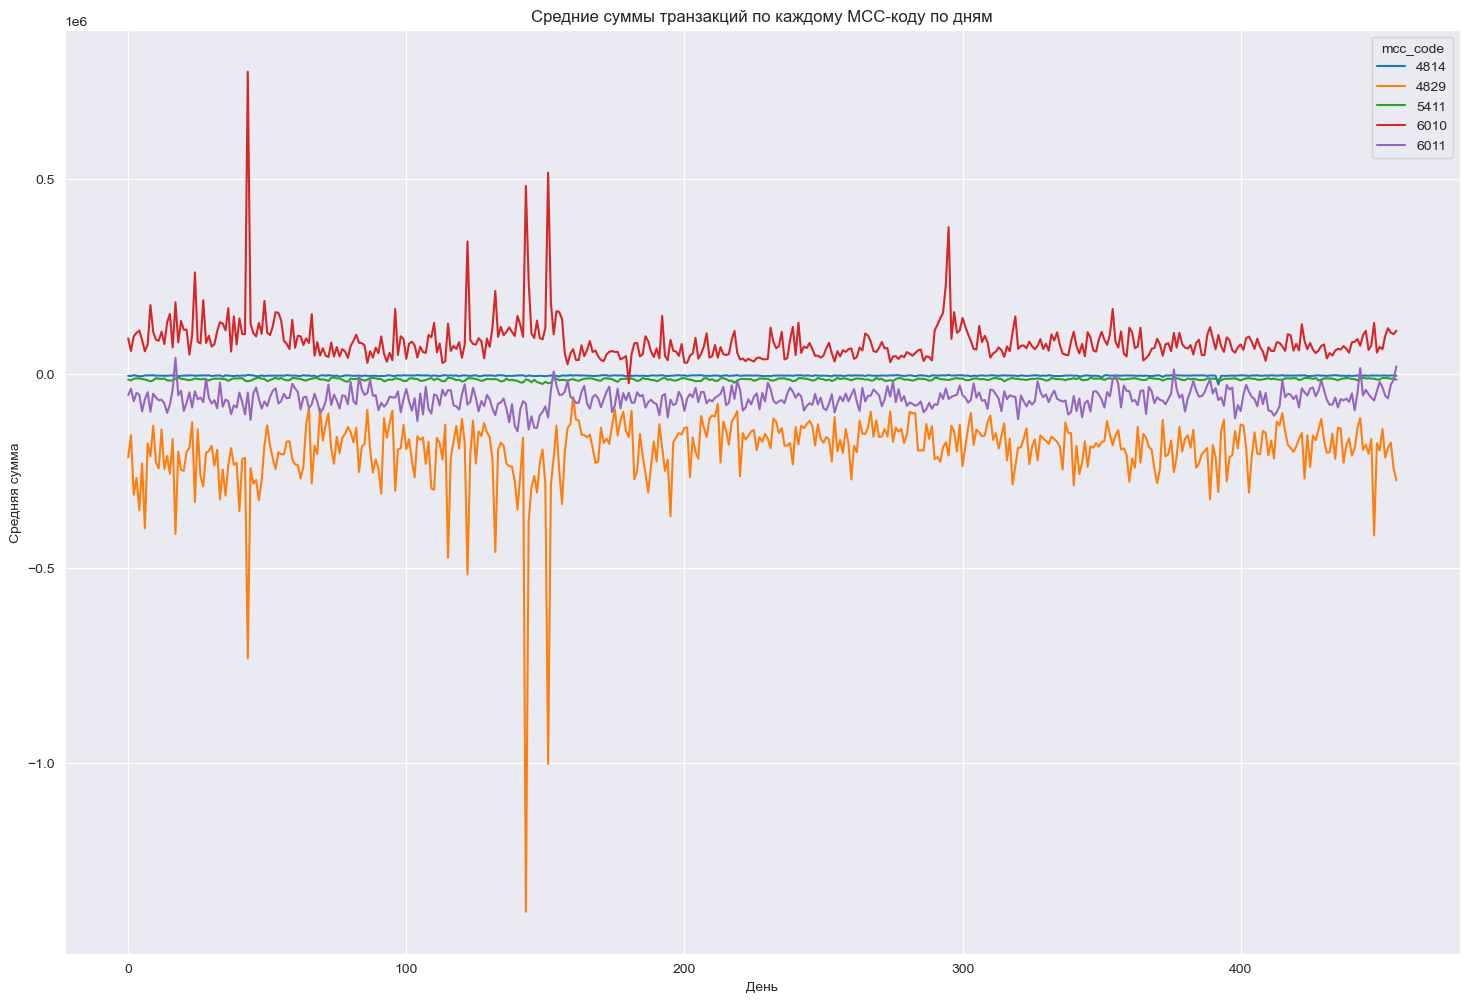

In [93]:
# Фильтрация MCC кодов, которые встретились более 60000 раз
popular_mcc_codes = transactions['mcc_code'].value_counts()[transactions['mcc_code'].value_counts() > 60000].index

# Фильтрация данных по выбранным MCC кодам
filtered_transactions = transactions[transactions['mcc_code'].isin(popular_mcc_codes)]

# Группировка данных по дню и MCC-коду, получение средних значений суммы amount
grouped_data = filtered_transactions.groupby(['tr_day', 'mcc_code'])['amount'].mean()

# Отрисовка зависимости средних сумм по каждому MCC-коду по дням
pivot_table = grouped_data.unstack()
pivot_table.plot(figsize=(18, 12), legend=True)
plt.xlabel('День')
plt.ylabel('Средняя сумма')
plt.title('Средние суммы транзакций по каждому MCC-коду по дням')
plt.show()
